In [1]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [2]:
import plot
import matplotlib.pyplot as plt
from identification import sample_identification
from read_chroma import read_only_chroma
from read_chroma import read_chromato_and_chromato_cube
from read_chroma import read_chroma
from peak_detection import peak_detection
import projection

In [3]:
# path='/media/camille/DATA1/cdf centroid/'
# file='A-F-028-817822-droite-ReCIVA.cdf'
file_path="D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/624848_0017VE_J0.cdf"
file_path= "D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Elo/VOC-compare/cdf centroid/Tedlar/A-A-026-854520-Tedlar.cdf"
file_path= "D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Elo/VOC-compare/cdf centroid/ReCIVA/A-F-028-817822-droite-ReCIVA.cdf"

In [4]:
chromato, time_rn, chromato_cube, sigma, mass_range=read_chromato_and_chromato_cube(file_path, mod_time=1.7, pre_process=True)

chromato read 12.328305959701538 s
--- 58.474740982055664 seconds --- to compute full spectra centroid
full spectra computed 61.85982918739319 s
baseline corrected


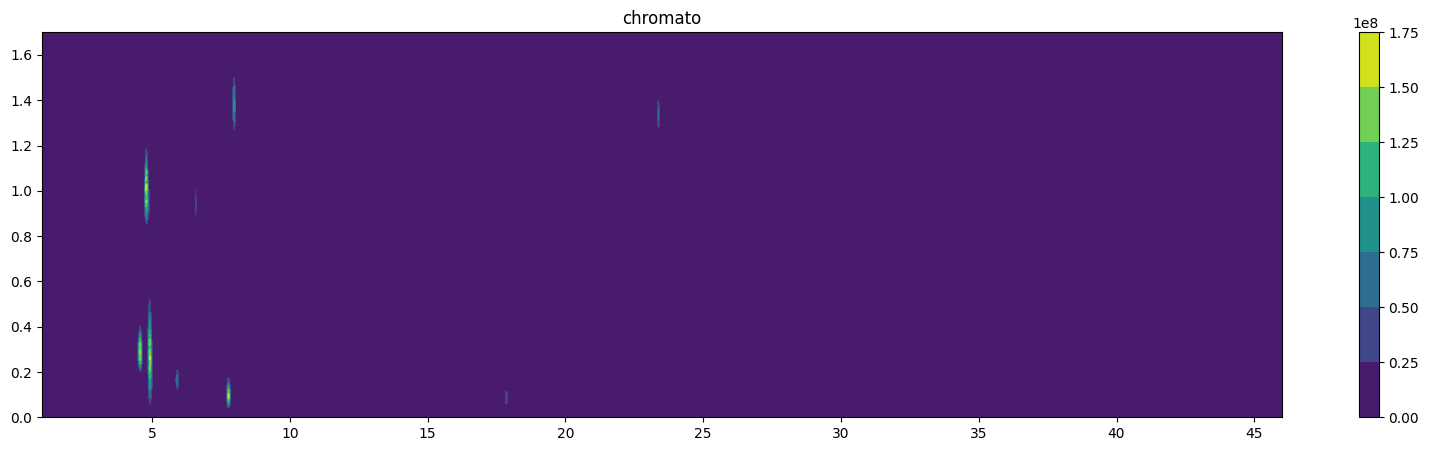

In [5]:
plt.rcParams['figure.figsize'] = [20, 5]
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, mod_time=1.7)

In [6]:
import numpy as np

In [8]:
coordinates

array([], dtype=float64)

In [11]:
100*sigma/np.max(chromato)

np.float64(0.0016087862889504955)

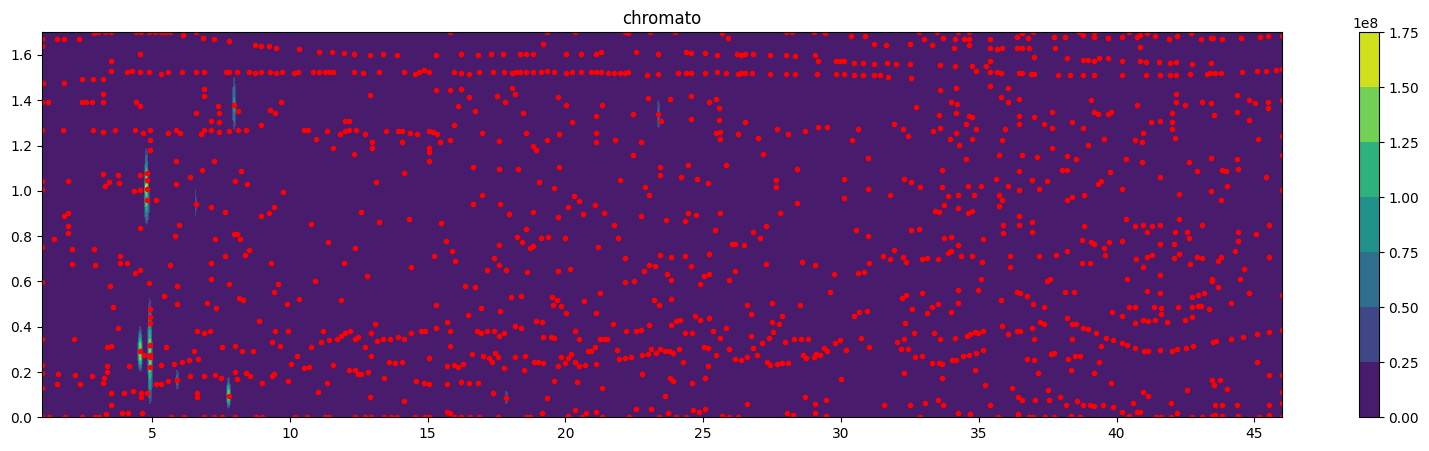

1334

In [16]:
coordinates = peak_detection(
        ((chromato), time_rn, mass_range),
        chromato_cube=chromato_cube,
        sigma=sigma,
        noise_factor=1,
        abs_threshold=0,
        rel_threshold=0.001,
        method="persistent_homology",
        mode="tic",
        cluster=True,
        min_distance=1,
        min_sigma=1,
        max_sigma=30,
        sigma_ratio=1.6,
        num_sigma=1,
        min_persistence=0.0002)


coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.7, chromato.shape)
plt.rcParams['figure.figsize'] = [20, 5]
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, mod_time=1.7)
len(coordinates_in_chromato)

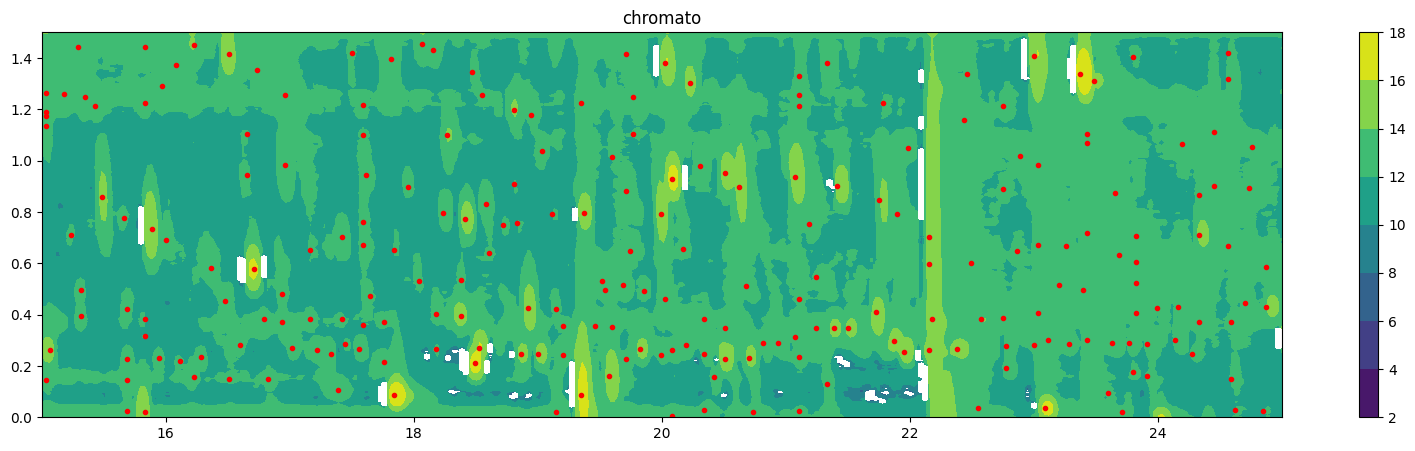

In [17]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=True, points=coordinates_in_chromato, mod_time=1.7, rt1=20, rt2=0.2, rt2_window=1.3)


In [5]:
sample_identification(
                path="D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/",
                file= "624848_0017VE_J0.cdf",
                output_path= "D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/output_python2dgc/",
                mod_time=1.7,
                method="peak_local_max",
                mode="tic",
                noise_factor = 2,
                hit_prob_min=65,
                abs_thresholds=0.,
                rel_thresholds=0.05,
                cluster=True,
                min_distance=1,
                min_sigma=1,
                max_sigma=30,
                sigma_ratio=1.6, 
                num_sigma=1,
                formated_spectra=True,
                match_factor_min=650,
                min_persistence=0.0001
                )

Identification started

chromato read 18.189802408218384 s
--- 54.43840217590332 seconds --- to compute full spectra centroid
full spectra computed 56.930519342422485 s
baseline corrected
nb peaks 315
nb_peaks:  315


c:\Users\Metabolomique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Benzeneacetaldehyde, �-oxo-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Metabolomique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �,�-Dihydroxyacetophenone: [-32, -32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Metabolomique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Hydroxyacetophenone: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Metabolomique\AppData\Local\Programs\Python

nb match:
315
nb match 315
Identification done 130.95733785629272 s


'D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/output_python2dgc/624848_0017VE_J0.txt & D:/GCxGC_MS/DATA/Dossier_partagé_GCxGC/Manue/GCxGC_VOLATIL-CF_01/output_python2dgc/624848_0017VE_J0.csv created'

# Plot chromatogram

In [ ]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False)
plot.visualizer((chromato, time_rn), title="log chromato")

Zoom around matrix or chromatogram coordinate

In [ ]:
# zoom around matrix coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
# zoom around chromatogram coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)

Plot 3D chromatogram (intensities as third coordinates)

In [ ]:
# plot with strides (faster)
plot.plot_3d_chromato(chromato)

In [ ]:
# plot without strides (slower but more precise)
plot.plot_3d_chromato(chromato, rstride=1, cstride=1)

# Plot peaks

In [ ]:
#package modules
from read_chroma import read_chromato_and_chromato_cube
from peak_detection import peak_detection
from identification import compute_matches_identification, cohort_identification_alignment_input_format_txt, cohort_identification_to_csv
from matching import matching_nist_lib_from_chromato_cube
from utils import get_name_dict
import projection
###
import numpy as np

In [ ]:
chromato, time_rn, chromato_cube, sigma, mass_range=read_chromato_and_chromato_cube(file_path, mod_time=1.25, pre_process=True)

In [ ]:
seuil=5
MIN_SEUIL = seuil * sigma * 100 / np.max(chromato)
# detect peaks
coordinates = peak_detection((chromato, time_rn, None), None, chromato_cube, MIN_SEUIL, None)
len(coordinates)

In [ ]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.25, chromato.shape)

In [ ]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
hit_prob_min=0
match_factor_min=0
# 2D peaks identification with NIST datanase
matches = matching_nist_lib_from_chromato_cube((chromato, time_rn, mass_range), chromato_cube, coordinates, mod_time = 1.25, hit_prob_min=hit_prob_min, match_factor_min=match_factor_min)

In [ ]:
# group coordinates by casno
casnos_dictall = get_name_dict(matches)

In [ ]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
import importlib
importlib.reload(plot)

In [ ]:
import importlib
importlib.reload(plot)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [ ]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)